In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import polars as pl
from PIL import Image

from src.configs.visualization_configs import FeatureDatetimeCfg
from src.utilities import find_project_root
from src.visualization import plot
from src.visualization.image_utils import (
    PasteLocation,
    concat_images,
    save_cated_images,
)

vector_img_ext = {"svg", "pdf"}
raster_img_ext = {"png"}
img_ext = vector_img_ext | raster_img_ext

In [2]:
project_root = find_project_root()
cfg64 = FeatureDatetimeCfg.from_datetime(2025, 1, 23, 16, 14, 36)
checkdata64 = pl.read_csv(cfg64.feature_path / "features_check_data.csv")

cfg32 = FeatureDatetimeCfg.from_datetime(2025, 1, 23, 16, 41, 16)
checkdata32 = pl.read_csv(cfg32.feature_path / "features_check_data.csv")

In [3]:
# 64x64px
arr64 = checkdata64.select(
    pl.exclude(["target", "prediction", "filename", "dirname"])
).to_numpy()
metacheckdata64 = checkdata64.select(
    pl.exclude(r"^column_\d+$")
).with_row_count("id")

# 32x32px
arr32 = checkdata32.select(
    pl.exclude(["target", "prediction", "filename", "dirname"])
).to_numpy()
metacheckdata32 = checkdata32.select(
    pl.exclude(r"^column_\d+$")
).with_row_count("id")

In [4]:
clsf_failed_expr = (
    (pl.col("target") != -1)
    & (pl.col("target") != pl.col("prediction"))
    & (pl.col("target") == 0)
)
metacheckdata32.filter(clsf_failed_expr)

id,target,prediction,dirname,filename
u32,i64,i64,i64,str
3615,0,1,3,"""10k_3_h000_w04…"
3616,0,1,3,"""10k_3_h000_w05…"
3639,0,1,3,"""10k_3_h000_w12…"
3651,0,1,3,"""10k_3_h032_w03…"
3731,0,1,3,"""10k_3_h096_w03…"
3735,0,1,3,"""10k_3_h096_w04…"
3739,0,1,3,"""10k_3_h096_w06…"
3748,0,1,3,"""10k_3_h096_w08…"
3757,0,1,3,"""10k_3_h096_w11…"


In [19]:
# Fail to classify
dst_dir = cfg32.figure_path.parent / "thesis-ch4" / "cnt_images"
imsize64 = cfg64.extract_cfg.dataset.image_size
dataset_dir64 = project_root / cfg64.extract_cfg.dataset.check_path
imgs64 = concat_images(
    metacheckdata64,
    dataset_dir64,
    imsize64,
    filter_expr=(pl.col("target") != -1)
    & (pl.col("target") == pl.col("prediction")),
)

imsize32 = cfg32.extract_cfg.dataset.image_size
dataset_dir32 = project_root / cfg32.extract_cfg.dataset.check_path
imgs32 = concat_images(
    metacheckdata32,
    dataset_dir32,
    imsize32,
    filter_expr=(pl.col("target") != -1)
    & (pl.col("target") == pl.col("prediction")),
)

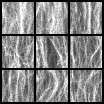

In [20]:
imgs32[0][7]

In [14]:
dst_dir

PosixPath('../reports/figures/ClassifierReflectance/thesis-ch4/cnt_images/32x32px')

In [22]:
dst_dir = cfg64.figure_path.parent.parent / "thesis-ch4" / "cnt_images" / "64x64px"
save_cated_images(
    imgs64,
    dst_dir,
    fname_format="label_{t}_sample_{d}_clsfc_correct.jpg",
    target_format={0: "low", 1: "high"},
)

In [25]:
dst_dir = cfg32.figure_path.parent / "thesis-ch4" / "cnt_images"
imsize64 = cfg64.extract_cfg.dataset.image_size
dataset_dir64 = project_root / cfg64.extract_cfg.dataset.check_path
imgs64_clsf_high = concat_images(
    metacheckdata64,
    dataset_dir64,
    imsize64,
    filter_expr=(pl.col("target") == -1) & (pl.col("prediction") == 1)
)
imgs64_clsf_low = concat_images(
    metacheckdata64,
    dataset_dir64,
    imsize64,
    filter_expr=(pl.col("target") == -1) & (pl.col("prediction") == 0)
)

imsize32 = cfg32.extract_cfg.dataset.image_size
dataset_dir32 = project_root / cfg32.extract_cfg.dataset.check_path
imgs32_clsf_high = concat_images(
    metacheckdata32,
    dataset_dir32,
    imsize32,
    filter_expr=(pl.col("target") == -1) & (pl.col("prediction") == 1)
)
imgs32_clsf_low = concat_images(
    metacheckdata32,
    dataset_dir32,
    imsize32,
    filter_expr=(pl.col("target") == -1) & (pl.col("prediction") == 0)
)

In [26]:
dst_dir = cfg64.figure_path.parent.parent / "thesis-ch4" / "cnt_images" / "64x64px"
save_cated_images(
    imgs64_clsf_high,
    dst_dir,
    fname_format="label_{t}_sample_{d}_clsfc_high.jpg",
    target_format={0: "low", 1: "high", -1: "none"},
)
save_cated_images(
    imgs64_clsf_low,
    dst_dir,
    fname_format="label_{t}_sample_{d}_clsfc_low.jpg",
    target_format={0: "low", 1: "high", -1: "none"},
)

dst_dir = cfg32.figure_path.parent.parent / "thesis-ch4" / "cnt_images" / "32x32px"
save_cated_images(
    imgs32_clsf_high,
    dst_dir,
    fname_format="label_{t}_sample_{d}_clsfc_high.jpg",
    target_format={0: "low", 1: "high", -1: "none"},
)
save_cated_images(
    imgs32_clsf_low,
    dst_dir,
    fname_format="label_{t}_sample_{d}_clsfc_low.jpg",
    target_format={0: "low", 1: "high", -1: "none"},
)


In [9]:
l_low_c_high = checkdata32.filter(
    (pl.col("target") == 0)
    & (pl.col("prediction") == 1)
)
print(l_low_c_high)
dataset_dir32 = project_root / cfg32.extract_cfg.dataset.check_path
imgs = concat_images(l_low_c_high, dataset_dir32, cfg32.extract_cfg.dataset.image_size)

shape: (110, 36)
┌───────────┬───────────┬───────────┬──────────┬───┬────────┬────────────┬─────────┬───────────────┐
│ column_0  ┆ column_1  ┆ column_2  ┆ column_3 ┆ … ┆ target ┆ prediction ┆ dirname ┆ filename      │
│ ---       ┆ ---       ┆ ---       ┆ ---      ┆   ┆ ---    ┆ ---        ┆ ---     ┆ ---           │
│ f64       ┆ f64       ┆ f64       ┆ f64      ┆   ┆ i64    ┆ i64        ┆ i64     ┆ str           │
╞═══════════╪═══════════╪═══════════╪══════════╪═══╪════════╪════════════╪═════════╪═══════════════╡
│ -0.018626 ┆ 0.213434  ┆ 0.420023  ┆ 0.000048 ┆ … ┆ 0      ┆ 1          ┆ 3       ┆ 10k_3_h000_w0 │
│           ┆           ┆           ┆          ┆   ┆        ┆            ┆         ┆ 480.png       │
│ -0.011462 ┆ 0.031903  ┆ 0.063482  ┆ 0.000034 ┆ … ┆ 0      ┆ 1          ┆ 3       ┆ 10k_3_h000_w0 │
│           ┆           ┆           ┆          ┆   ┆        ┆            ┆         ┆ 512.png       │
│ -0.012139 ┆ 0.049004  ┆ 0.097039  ┆ 0.000035 ┆ … ┆ 0      ┆ 1          ┆

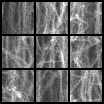

In [14]:
imgs[0][3]